## News scraping

This notebook extracts news from www.minuto30.com based on the tutorial in https://www.dataquest.io/blog/web-scraping-tutorial-python/

Get html code for the headline pages for Medellín

In [35]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import wordcloud

no_pages = 100
 
pages = ["https://www.minuto30.com/medellin/page/" + str(x) for x in range(1,no_pages+1)]

pages = [requests.get(dir) for dir in pages]
soups = [BeautifulSoup(x.content, 'html.parser') for x in pages]

The page presents all the articles in a container of class "main-content". Within that container, news articles are in boxes of the class "mh-posts-list-content".

We extract the code in the main container and then find all the articles. We display the code for the first article.

In [36]:
containers = [x.find(id="main-content") for x in soups]
articles = [x.find_all(class_="mh-posts-list-content") for x in containers]

# Articles is currentily a list of lists. Make it a simple list
articles = [article for pag in articles for article in pag]

We extract the title, date, and author from each article.

In [37]:
# Article titles
titles = [x.select(".entry-title") for x in articles]
titles = [ti[0].get_text() for ti in titles]
titles = [re.sub("(\\n|\\t)","",ti) for ti in titles]

# Dates
dates = [x.select(".mh-meta .entry-meta-date") for x in articles]
dates = [d[0].get_text() for d in dates]

# Authors
authors = [x.select(".mh-meta .entry-meta-author") for x in articles]
authors = [at[0].get_text() for at in authors]

# Remove "fotos y video" from titles
titles = [re.sub("^(EN )?(FOTOS y VIDEO|VIDEO y FOTOS|FOTOS|VIDEO):? ","",ti) for ti in titles]

We organize the results in a dataframe.

In [38]:
news = pd.DataFrame({
        "date": dates, 
        "author": authors, 
        "title": titles
    })
news

,author,date,title
0,Mauricio Berrío,"2 junio, 2018",Caminaba por el barrio Cristóbal cuando motori...
1,Mauricio Berrío,"2 junio, 2018",Se le montaron a la volqueta y le dispararon e...
2,Mauricio Berrío,"2 junio, 2018",Dos carros y tres motos fueron recuperados por...
3,ZPaola Agredo,"2 junio, 2018","Una valiente patrullera, entre los policías qu..."
4,ZPaola Agredo,"2 junio, 2018",Debido a una fuga en la red hay interrupción d...
5,Mauricio Berrío,"2 junio, 2018",Dos menores caminaban por El Danubio y fueron ...
6,Mauricio Berrío,"2 junio, 2018",En medio de una riña un hombre resultó muerto ...
7,Mauricio Berrío,"2 junio, 2018",Ladrón fue capturado en Las Palmas con element...
8,Stephany Ceballos,"1 junio, 2018",Tracto camión se quedó sin frenos bajando del ...
9,Mauricio Berrío,"1 junio, 2018",Capturado en el barrio 13 de Noviembre


## Wordcloud

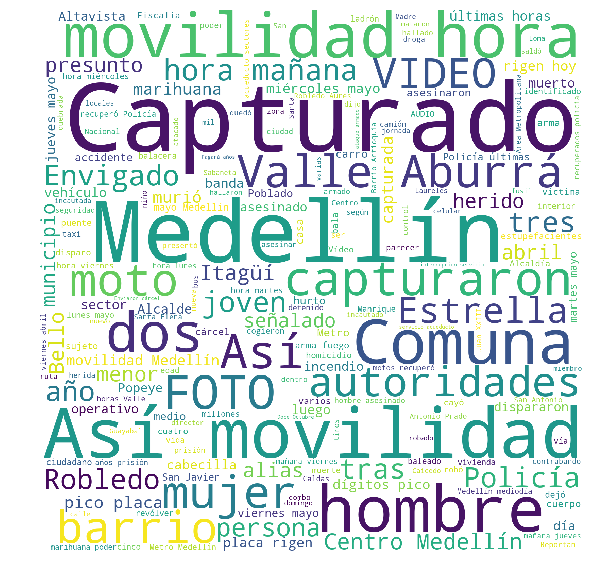

In [42]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Get the list of words that should be ommitted.
stopWords = set(stopwords.words('spanish'))

# Create a text by joining all news titles.
text = ' '.join(news['title'])

# Create and print word cloud
wordcloud = WordCloud(stopwords=stopWords,
                      background_color='white',
                      width=1600,
                      height=1600
                      ).generate(text)

plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()